Importing the Necessary Libraries

In [29]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from faker import Faker
import random

In [30]:
# Set random seed for reproducibility
np.random.seed(42)
random.seed(42)


In [31]:
# Initialize Faker
fake = Faker()

In [32]:
# Generate synthetic dataset (presented as from America Nepal Education Foundation)
n_records = 1500
data = {
    'Student_ID': [fake.unique.bothify(text='STU####') for _ in range(n_records)],  # Changed to four digits for uniqueness
    'Age': np.random.randint(11, 19, n_records),
    'Gender': np.random.choice(['Male', 'Female'], n_records, p=[0.52, 0.48]),
    'Family_Income': np.random.normal(20000, 10000, n_records).round().clip(5000, 50000),
    'Parental_Education': np.random.choice(['None', 'Primary', 'Secondary', 'Higher'], n_records, p=[0.15, 0.45, 0.30, 0.10]),
    'Distance_to_School': np.random.uniform(0.5, 15, n_records).round(2),
    'Attendance_Rate': np.random.uniform(20, 100, n_records).round(2),
    'Academic_Score': np.random.uniform(0, 100, n_records).round(2),
    'Extracurricular_Participation': np.random.choice(['Yes', 'No'], n_records, p=[0.40, 0.60]),
    'Dropout_Status': np.random.choice(['No', 'Yes'], n_records, p=[0.85, 0.15]),
    'School_ID': [f'SCH{str(random.randint(1, 50)).zfill(2)}' for _ in range(n_records)]
}

df = pd.DataFrame(data)

In [33]:
df = pd.DataFrame(data)

# Introduce missing values (~2% for specified columns)
for col in ['Family_Income', 'Attendance_Rate', 'Parental_Education']:
    n_missing = int(n_records * 0.02)
    missing_indices = np.random.choice(df.index, n_missing, replace=False)
    df.loc[missing_indices, col] = np.nan

In [34]:
# Saving raw dataset
df.to_csv('bagmati_education_insights_2024.csv', index=False)

In [35]:

# Loading dataset (simulating ANEF data)
df = pd.read_csv('bagmati_education_insights_2024.csv')

Data Cleaning

In [36]:
# Data Cleaning
# Check for missing values
print("Missing values before cleaning:")
print(df.isnull().sum())


Missing values before cleaning:
Student_ID                         0
Age                                0
Gender                             0
Family_Income                     30
Parental_Education               257
Distance_to_School                 0
Attendance_Rate                   30
Academic_Score                     0
Extracurricular_Participation      0
Dropout_Status                     0
School_ID                          0
dtype: int64


In [ ]:
# Impute missing values
df['Family_Income'].fillna(df['Family_Income'].median(), inplace=True)
df['Attendance_Rate'].fillna(df.groupby('School_ID')['Attendance_Rate'].transform('mean'), inplace=True)
df['Parental_Education'].fillna(df['Parental_Education'].mode()[0], inplace=True)


In [ ]:
# Standardize categorical variables
df['Gender'] = df['Gender'].replace({'M': 'Male', 'F': 'Female'})
df['Parental_Education'] = df['Parental_Education'].replace({'Sec': 'Secondary', 'Prim': 'Primary'})

In [ ]:
# Encoding categorical variables
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df['Extracurricular_Participation'] = df['Extracurricular_Participation'].map({'Yes': 1, 'No': 0})
df['Parental_Education'] = df['Parental_Education'].map({'None': 0, 'Primary': 1, 'Secondary': 2, 'Higher': 3})
df['Dropout_Status'] = df['Dropout_Status'].map({'Yes': 1, 'No': 0})

In [ ]:
# Normalization
scaler = MinMaxScaler()
numerical_cols = ['Family_Income', 'Distance_to_School', 'Attendance_Rate', 'Academic_Score']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [ ]:
# Drop unnecessary column
df.drop('Student_ID', axis=1, inplace=True)

In [ ]:
# Check for missing values after cleaning
print("\nMissing values after cleaning:")
print(df.isnull().sum())


Missing values after cleaning:
Age                              0
Gender                           0
Family_Income                    0
Parental_Education               0
Distance_to_School               0
Attendance_Rate                  0
Academic_Score                   0
Extracurricular_Participation    0
Dropout_Status                   0
School_ID                        0
dtype: int64


In [ ]:
# Save preprocessed dataset
df.to_csv('preprocessed_bagmati_education.csv', index=False)
print("\nPreprocessing completed. Preprocessed dataset saved as 'preprocessed_bagmati_education.csv'.")
print("\nFirst 5 rows of preprocessed dataset:")
print(df.head())


Preprocessing completed. Preprocessed dataset saved as 'preprocessed_bagmati_education.csv'.

First 5 rows of preprocessed dataset:
   Age  Gender  Family_Income  Parental_Education  Distance_to_School  \
0   17       1       0.550044                   1            0.550725   
1   14       0       0.444689                   2            0.192547   
2   15       0       0.375467                   1            0.102139   
3   17       1       0.555778                   1            0.911663   
4   13       1       0.000000                   2            0.821256   

   Attendance_Rate  Academic_Score  Extracurricular_Participation  \
0         0.693328        0.014909                              1   
1         0.572412        0.161097                              0   
2         0.908499        0.996498                              1   
3         0.122418        0.180008                              1   
4         0.534485        0.502702                              0   

   Dropout_St

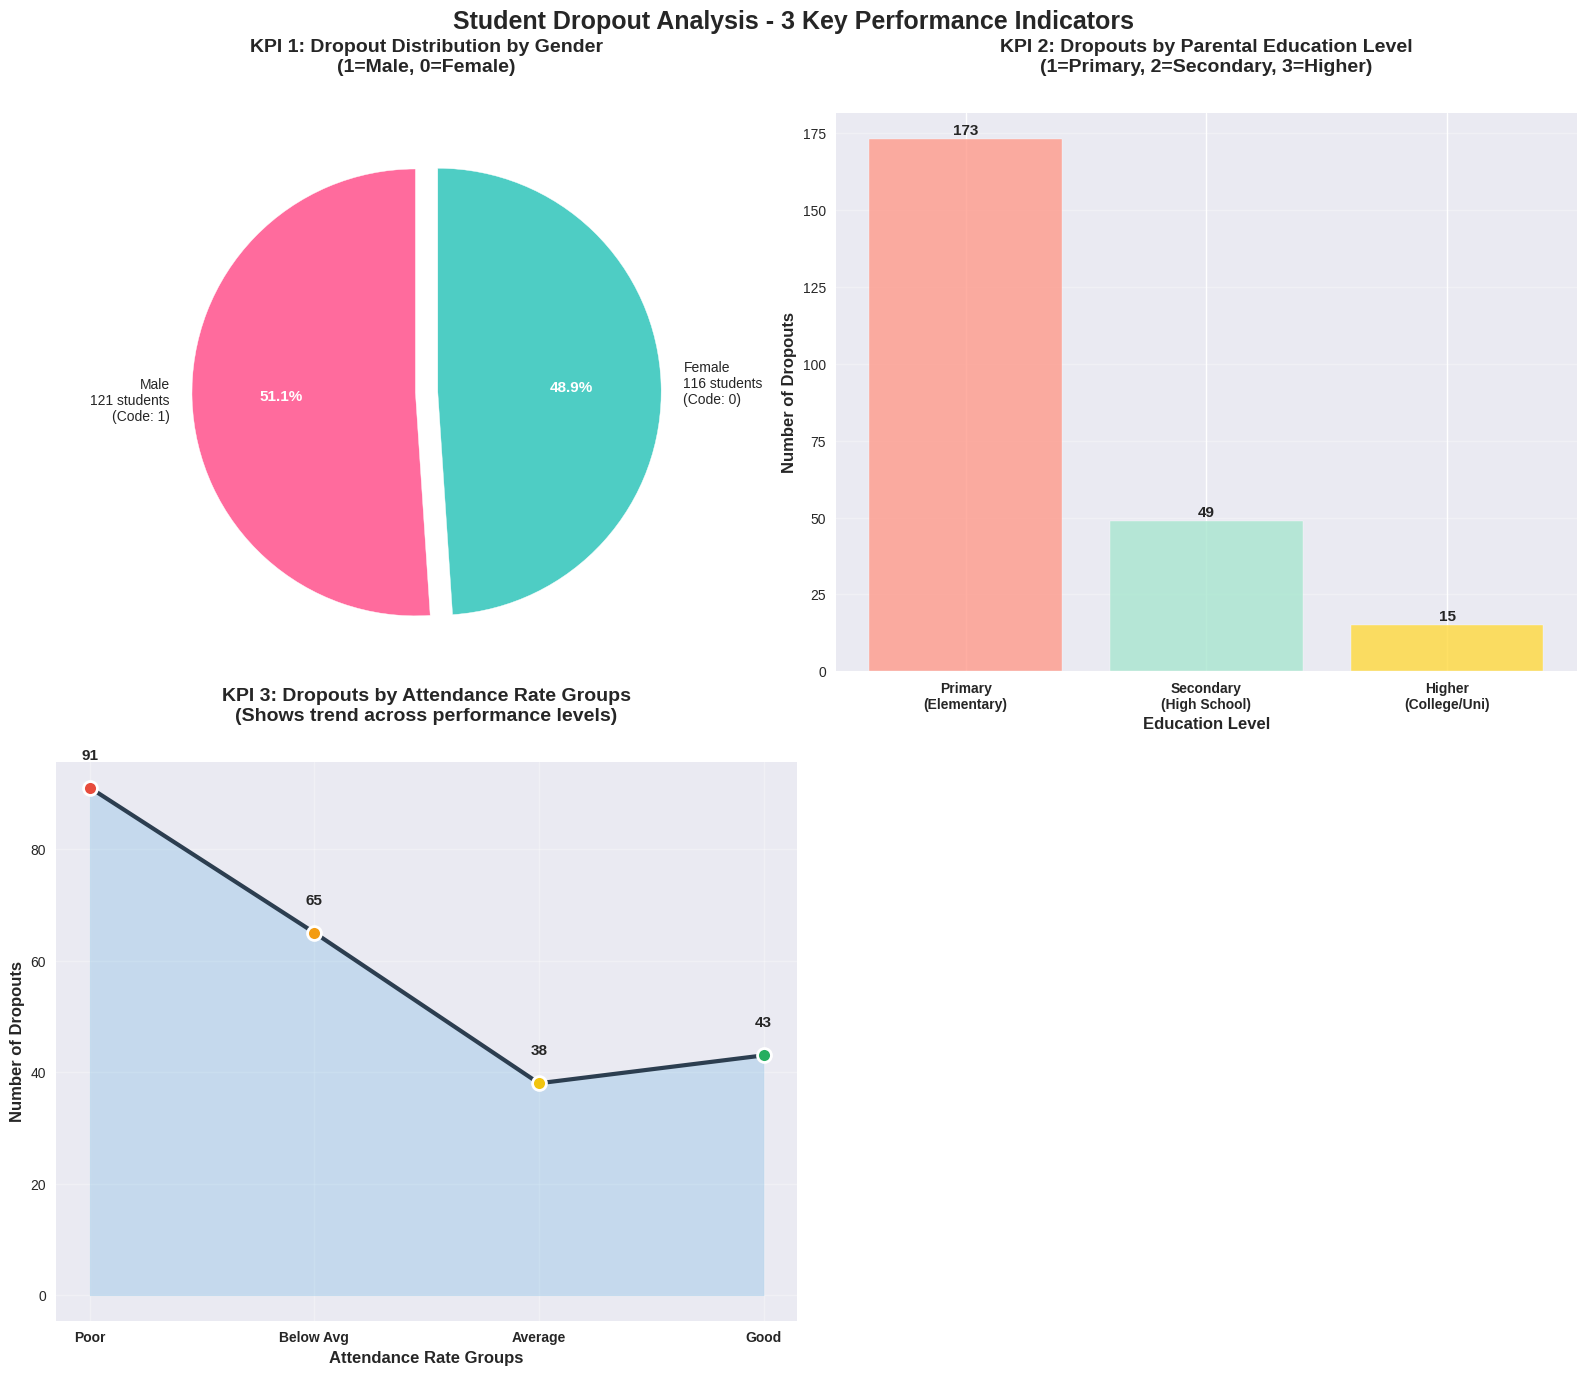

Saving individual KPI charts...


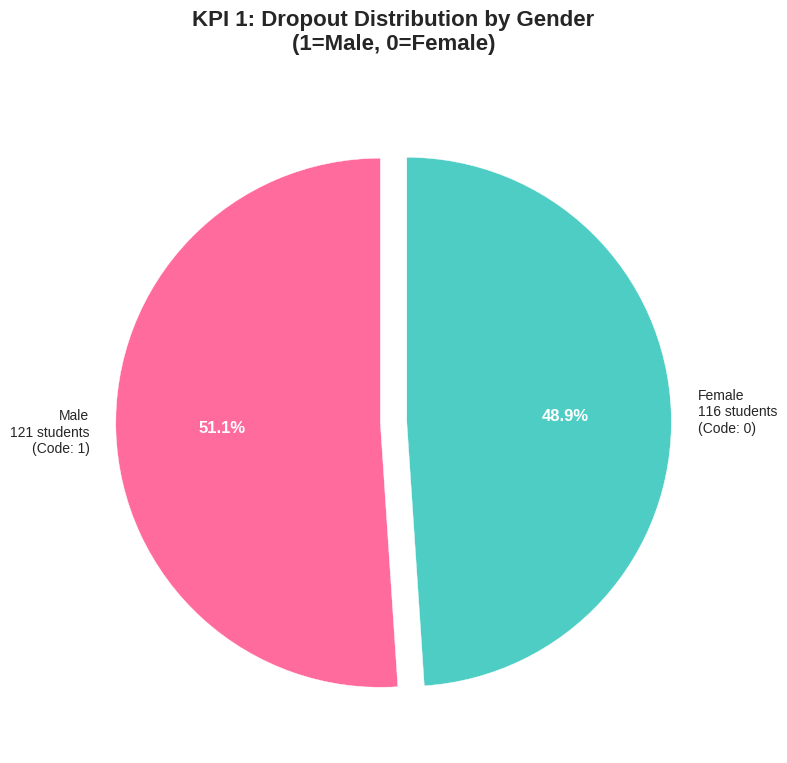

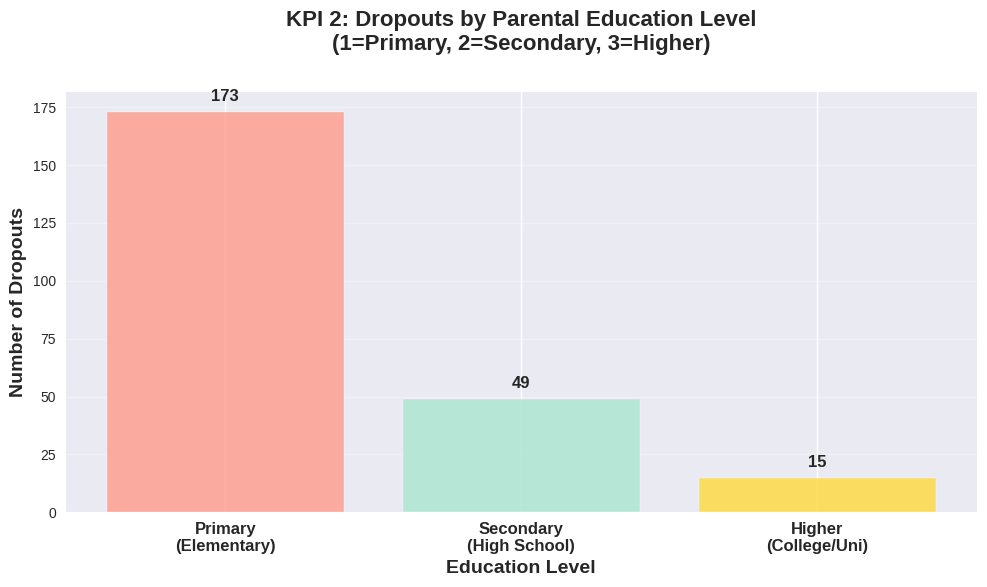

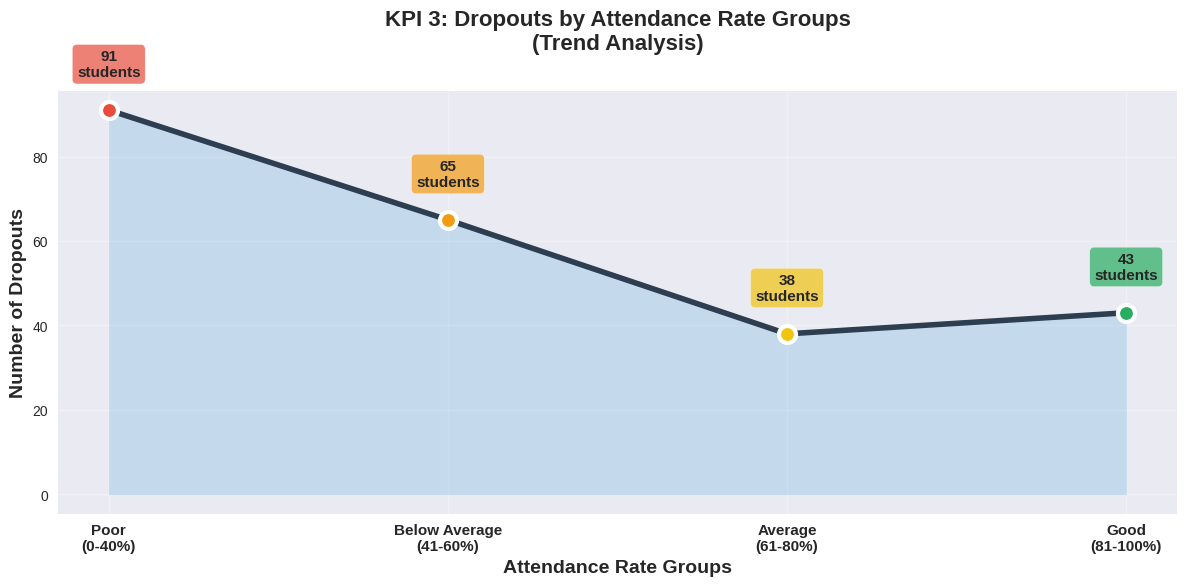

STUDENT DROPOUT ANALYSIS SUMMARY
Total students analyzed: 1500
Total dropouts: 237
Dropout rate: 15.8%

Gender Breakdown (1=Male, 0=Female):
  Male: 121 students (51.1%)
  Female: 116 students (48.9%)

Parental Education Breakdown:
  Primary: 173 students (73.0%)
  Secondary: 49 students (20.7%)
  Higher: 15 students (6.3%)

Attendance Group Breakdown:
  Poor (0-40%): 91 students (38.4%)
  Below Average (41-60%): 65 students (27.4%)
  Average (61-80%): 38 students (16.0%)
  Good (81-100%): 43 students (18.1%)

Analysis complete! All charts saved successfully:
   Combined dashboard: 'student_dropout_analysis_combined.png'
     Individual charts:
    - KPI1_gender_distribution_pie.png
    - KPI2_education_level_bar.png
    - KPI3_attendance_groups_line.png


In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the plot style to make it look professional
plt.style.use('seaborn-v0_8')
plt.rcParams.update({
    'figure.figsize': (15, 10),
    'font.size': 11,
    'axes.titlesize': 14,
    'axes.labelsize': 12,
    'font.family': 'sans-serif'
})

# Creating a figure with 3 subplots for our KPIs
fig, axes = plt.subplots(2, 2, figsize=(16, 14))  # Increased figure height
fig.suptitle('Student Dropout Analysis - 3 Key Performance Indicators',
             fontsize=18, fontweight='bold', y=0.98)  # Moved title higher

# Remove the 4th subplot since we only need 3 KPIs
fig.delaxes(axes[1, 1])

# KPI 1: Gender Distribution of Dropouts (Pie Chart)
ax1 = axes[0, 0]

# Getting the count of dropouts by gender (only students who dropped out)
dropout_by_gender = df[df['Dropout_Status'] == 1]['Gender'].value_counts()

# Creating labels that show the meaning of codes
gender_labels = []
for gender_code, count in dropout_by_gender.items():
    if gender_code == 1:
        gender_labels.append(f'Male\n{count} students\n(Code: 1)')
    else:
        gender_labels.append(f'Female\n{count} students\n(Code: 0)')

# Nice colors for the pie chart
colors = ['#FF6B9D', '#4ECDC4']

# Creating the pie chart
wedges, texts, autotexts = ax1.pie(dropout_by_gender.values,
                                  labels=gender_labels,
                                  autopct='%1.1f%%',
                                  colors=colors,
                                  startangle=90,
                                  explode=(0.05, 0.05))  # slight separation

# Making the percentage text more visible
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(11)

ax1.set_title('KPI 1: Dropout Distribution by Gender\n(1=Male, 0=Female)',
              fontweight='bold', pad=30)  # Increased padding

# KPI 2: Parental Education Level of Dropouts (Bar Chart)
# The dataset codes: 1=Primary, 2=Secondary, 3=Higher education
ax2 = axes[0, 1]

# Getting dropout counts by parental education level
dropout_by_education = df[df['Dropout_Status'] == 1]['Parental_Education'].value_counts().sort_index()

# Creating descriptive labels for education levels
education_levels = []
for edu_code in sorted(dropout_by_education.index):
    if edu_code == 1:
        education_levels.append('Primary\n(Elementary)')
    elif edu_code == 2:
        education_levels.append('Secondary\n(High School)')
    elif edu_code == 3:
        education_levels.append('Higher\n(College/Uni)')
    else:
        education_levels.append(f'Level {edu_code}')  # fallback

# Different colors for each education level
bar_colors = ['#FF9A8B', '#A8E6CF', '#FFD93D']

# Creating the bar chart
bars = ax2.bar(range(len(dropout_by_education)),
               dropout_by_education.values,
               color=bar_colors[:len(dropout_by_education)],
               alpha=0.8)

# Adding the count labels on top of each bar
for i, (bar, count) in enumerate(zip(bars, dropout_by_education.values)):
    ax2.text(bar.get_x() + bar.get_width()/2,
             bar.get_height() + 0.5,
             str(count),
             ha='center', va='bottom',
             fontweight='bold', fontsize=11)

# Setting up the labels and title
ax2.set_title('KPI 2: Dropouts by Parental Education Level\n(1=Primary, 2=Secondary, 3=Higher)',
              fontweight='bold', pad=30)  # Increased padding
ax2.set_xlabel('Education Level', fontweight='bold')
ax2.set_ylabel('Number of Dropouts', fontweight='bold')
ax2.set_xticks(range(len(dropout_by_education)))
ax2.set_xticklabels(education_levels, fontweight='bold')

# Adding a light grid to make it easier to read
ax2.grid(axis='y', alpha=0.3)

# KPI 3: Dropouts by Attendance Rate Groups (Line Chart)
# I'm grouping attendance rates into categories to see the trend
ax3 = axes[1, 0]

# Creating attendance groups (learned this binning technique in class)
attendance_groups = pd.cut(df['Attendance_Rate'],
                          bins=[0, 0.4, 0.6, 0.8, 1.0],
                          labels=['Poor (0-40%)', 'Below Average (41-60%)',
                                 'Average (61-80%)', 'Good (81-100%)'])

# Adding the groups to our dataframe temporarily
df_temp = df.copy()
df_temp['Attendance_Group'] = attendance_groups

# Counting dropouts in each attendance group
dropout_by_attendance = df_temp[df_temp['Dropout_Status'] == 1].groupby('Attendance_Group', observed=True).size()

# Making sure all groups are represented (filling missing with 0)
all_groups = ['Poor (0-40%)', 'Below Average (41-60%)', 'Average (61-80%)', 'Good (81-100%)']
dropout_by_attendance = dropout_by_attendance.reindex(all_groups, fill_value=0)

# Creating the line chart
x_positions = range(len(dropout_by_attendance))
ax3.plot(x_positions, dropout_by_attendance.values,
         marker='o', color='#2C3E50', linewidth=3, markersize=8)

# Adding different colored dots for each point
point_colors = ['#E74C3C', '#F39C12', '#F1C40F', '#27AE60']
for i, (x, y) in enumerate(zip(x_positions, dropout_by_attendance.values)):
    ax3.scatter(x, y, color=point_colors[i], s=100, zorder=5, edgecolor='white', linewidth=2)

    # Adding the count above each point
    ax3.text(x, y + max(dropout_by_attendance.values) * 0.05,
             str(y), ha='center', va='bottom',
             fontweight='bold', fontsize=11)

# Setting up labels and title
ax3.set_title('KPI 3: Dropouts by Attendance Rate Groups\n(Shows trend across performance levels)',
              fontweight='bold', pad=30)  # Increased padding
ax3.set_xlabel('Attendance Rate Groups', fontweight='bold')
ax3.set_ylabel('Number of Dropouts', fontweight='bold')
ax3.set_xticks(x_positions)
ax3.set_xticklabels(['Poor', 'Below Avg', 'Average', 'Good'], fontweight='bold')

# Adding grid and background styling
ax3.grid(True, alpha=0.3)
ax3.fill_between(x_positions, dropout_by_attendance.values, alpha=0.2, color='#3498DB')

# Making the layout look nice with more spacing
plt.subplots_adjust(top=0.92, hspace=0.4, wspace=0.3)  # Added this line for better spacing

# Saving the combined chart
plt.savefig('student_dropout_analysis_combined.png', dpi=300, bbox_inches='tight')
plt.show()

print("Saving individual KPI charts...")

# KPI 1 - Individual Pie Chart for Gender Distribution
fig1, ax1_individual = plt.subplots(figsize=(8, 8))

wedges, texts, autotexts = ax1_individual.pie(dropout_by_gender.values,
                                             labels=gender_labels,
                                             autopct='%1.1f%%',
                                             colors=['#FF6B9D', '#4ECDC4'],
                                             startangle=90,
                                             explode=(0.05, 0.05))

# Making the text look good
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(12)

ax1_individual.set_title('KPI 1: Dropout Distribution by Gender\n(1=Male, 0=Female)',
                        fontweight='bold', fontsize=16, pad=30)

# Save individual pie chart
plt.savefig('KPI1_gender_distribution_pie.png', dpi=300, bbox_inches='tight')
plt.show()

# KPI 2 - Individual Bar Chart for Education Levels
fig2, ax2_individual = plt.subplots(figsize=(10, 6))

bars = ax2_individual.bar(range(len(dropout_by_education)),
                         dropout_by_education.values,
                         color=['#FF9A8B', '#A8E6CF', '#FFD93D'][:len(dropout_by_education)],
                         alpha=0.8)

# Adding count labels on bars
for i, (bar, count) in enumerate(zip(bars, dropout_by_education.values)):
    ax2_individual.text(bar.get_x() + bar.get_width()/2,
                       bar.get_height() + max(dropout_by_education.values) * 0.02,
                       str(count),
                       ha='center', va='bottom',
                       fontweight='bold', fontsize=12)

ax2_individual.set_title('KPI 2: Dropouts by Parental Education Level\n(1=Primary, 2=Secondary, 3=Higher)',
                        fontweight='bold', fontsize=16, pad=30)
ax2_individual.set_xlabel('Education Level', fontweight='bold', fontsize=14)
ax2_individual.set_ylabel('Number of Dropouts', fontweight='bold', fontsize=14)
ax2_individual.set_xticks(range(len(dropout_by_education)))
ax2_individual.set_xticklabels(education_levels, fontweight='bold', fontsize=12)
ax2_individual.grid(axis='y', alpha=0.3)

# Save individual bar chart
plt.savefig('KPI2_education_level_bar.png', dpi=300, bbox_inches='tight')
plt.show()

# KPI 3 - Individual Line Chart for Attendance Groups
fig3, ax3_individual = plt.subplots(figsize=(12, 6))

# Creating the line chart
x_positions = range(len(dropout_by_attendance))
ax3_individual.plot(x_positions, dropout_by_attendance.values,
                   marker='o', color='#2C3E50', linewidth=4, markersize=10)

# Adding colored dots and labels for each point
point_colors = ['#E74C3C', '#F39C12', '#F1C40F', '#27AE60']
for i, (x, y) in enumerate(zip(x_positions, dropout_by_attendance.values)):
    ax3_individual.scatter(x, y, color=point_colors[i], s=150, zorder=5,
                          edgecolor='white', linewidth=3)

    # Adding the count above each point with better styling
    ax3_individual.text(x, y + max(dropout_by_attendance.values) * 0.08,
                       f'{y}\nstudents', ha='center', va='bottom',
                       fontweight='bold', fontsize=11,
                       bbox=dict(boxstyle="round,pad=0.3", facecolor=point_colors[i],
                                alpha=0.7, edgecolor='white'))

ax3_individual.set_title('KPI 3: Dropouts by Attendance Rate Groups\n(Trend Analysis)',
                        fontweight='bold', fontsize=16, pad=30)
ax3_individual.set_xlabel('Attendance Rate Groups', fontweight='bold', fontsize=14)
ax3_individual.set_ylabel('Number of Dropouts', fontweight='bold', fontsize=14)
ax3_individual.set_xticks(x_positions)
ax3_individual.set_xticklabels(['Poor\n(0-40%)', 'Below Average\n(41-60%)',
                               'Average\n(61-80%)', 'Good\n(81-100%)'],
                              fontweight='bold', fontsize=11)

# Adding styling
ax3_individual.grid(True, alpha=0.3)
ax3_individual.fill_between(x_positions, dropout_by_attendance.values, alpha=0.2, color='#3498DB')

# Save individual line chart
plt.savefig('KPI3_attendance_groups_line.png', dpi=300, bbox_inches='tight')
plt.show()

# Printing summary statistics
print("STUDENT DROPOUT ANALYSIS SUMMARY")
print(f"Total students analyzed: {len(df)}")
print(f"Total dropouts: {len(df[df['Dropout_Status'] == 1])}")
print(f"Dropout rate: {(len(df[df['Dropout_Status'] == 1]) / len(df) * 100):.1f}%")

print("\nGender Breakdown (1=Male, 0=Female):")
for gender_code, count in dropout_by_gender.items():
    gender_name = "Male" if gender_code == 1 else "Female"
    percentage = (count / dropout_by_gender.sum() * 100)
    print(f"  {gender_name}: {count} students ({percentage:.1f}%)")

print("\nParental Education Breakdown:")
edu_names = {1: "Primary", 2: "Secondary", 3: "Higher"}
for edu_code, count in dropout_by_education.items():
    edu_name = edu_names.get(edu_code, f"Level {edu_code}")
    percentage = (count / dropout_by_education.sum() * 100)
    print(f"  {edu_name}: {count} students ({percentage:.1f}%)")

print("\nAttendance Group Breakdown:")
for group, count in dropout_by_attendance.items():
    if count > 0:  # only show groups with dropouts
        percentage = (count / dropout_by_attendance.sum() * 100)
        print(f"  {group}: {count} students ({percentage:.1f}%)")

print("\nAnalysis complete! All charts saved successfully:")
print("   Combined dashboard: 'student_dropout_analysis_combined.png'")
print("     Individual charts:")
print("    - KPI1_gender_distribution_pie.png")
print("    - KPI2_education_level_bar.png")
print("    - KPI3_attendance_groups_line.png")

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
# Setting plot style to avoid deprecated 'seaborn' style warning
sns.set_style('whitegrid')
sns.set(font_scale=1.2)


In [ ]:
# Loading preprocessed dataset
df = pd.read_csv('preprocessed_bagmati_education.csv')

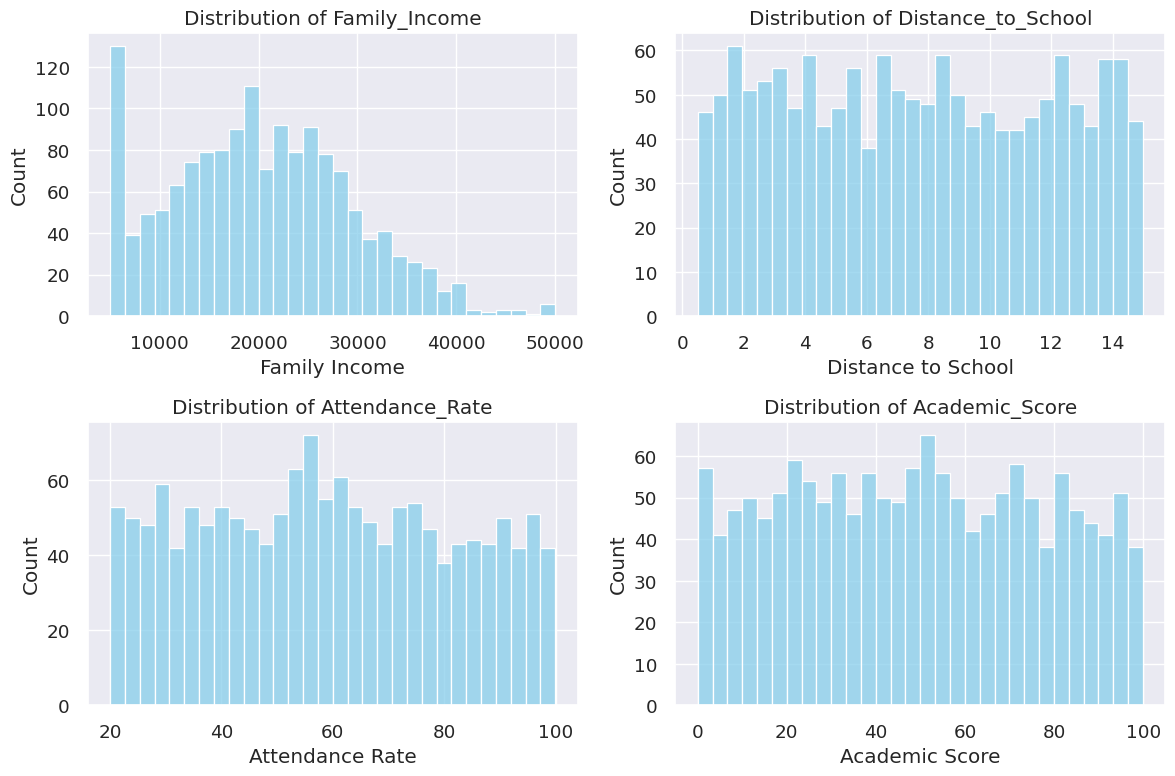

In [39]:
# Figure 1: Histograms of Numerical Features
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
numerical_cols = ['Family_Income', 'Distance_to_School', 'Attendance_Rate', 'Academic_Score']
for i, col in enumerate(numerical_cols):
    ax = axes[i // 2, i % 2]
    sns.histplot(df[col], bins=30, ax=ax, color='skyblue')
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(col.replace('_', ' '))
    ax.set_ylabel('Count')
plt.tight_layout()
plt.savefig('histograms_numerical_features.png')
plt.show()

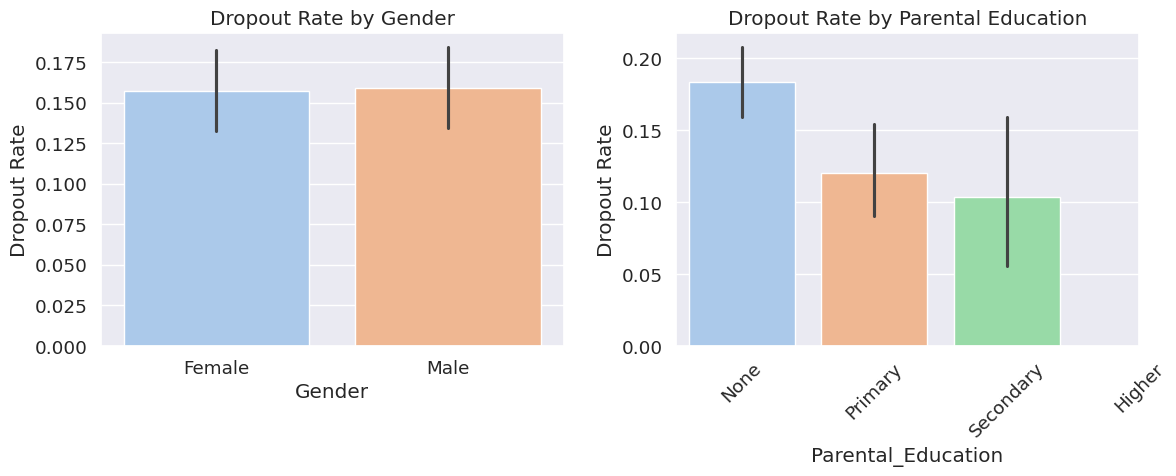

In [ ]:
# Figure 2: Bar Plot of Dropout Rates by Gender and Parental Education
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
# By Gender
sns.barplot(x='Gender', y='Dropout_Status', hue='Gender', data=df, ax=ax1, palette='pastel', legend=False)
ax1.set_title('Dropout Rate by Gender')
ax1.set_xticks([0, 1])
ax1.set_xticklabels(['Female', 'Male'])
ax1.set_ylabel('Dropout Rate')
# By Parental Education
sns.barplot(x='Parental_Education', y='Dropout_Status', hue='Parental_Education', data=df, ax=ax2, palette='pastel', legend=False)
ax2.set_title('Dropout Rate by Parental Education')
ax2.set_xticks([0, 1, 2, 3])
ax2.set_xticklabels(['None', 'Primary', 'Secondary', 'Higher'], rotation=45)
ax2.set_ylabel('Dropout Rate')
plt.tight_layout()
plt.savefig('barplot_dropout_rates.png')
plt.show()


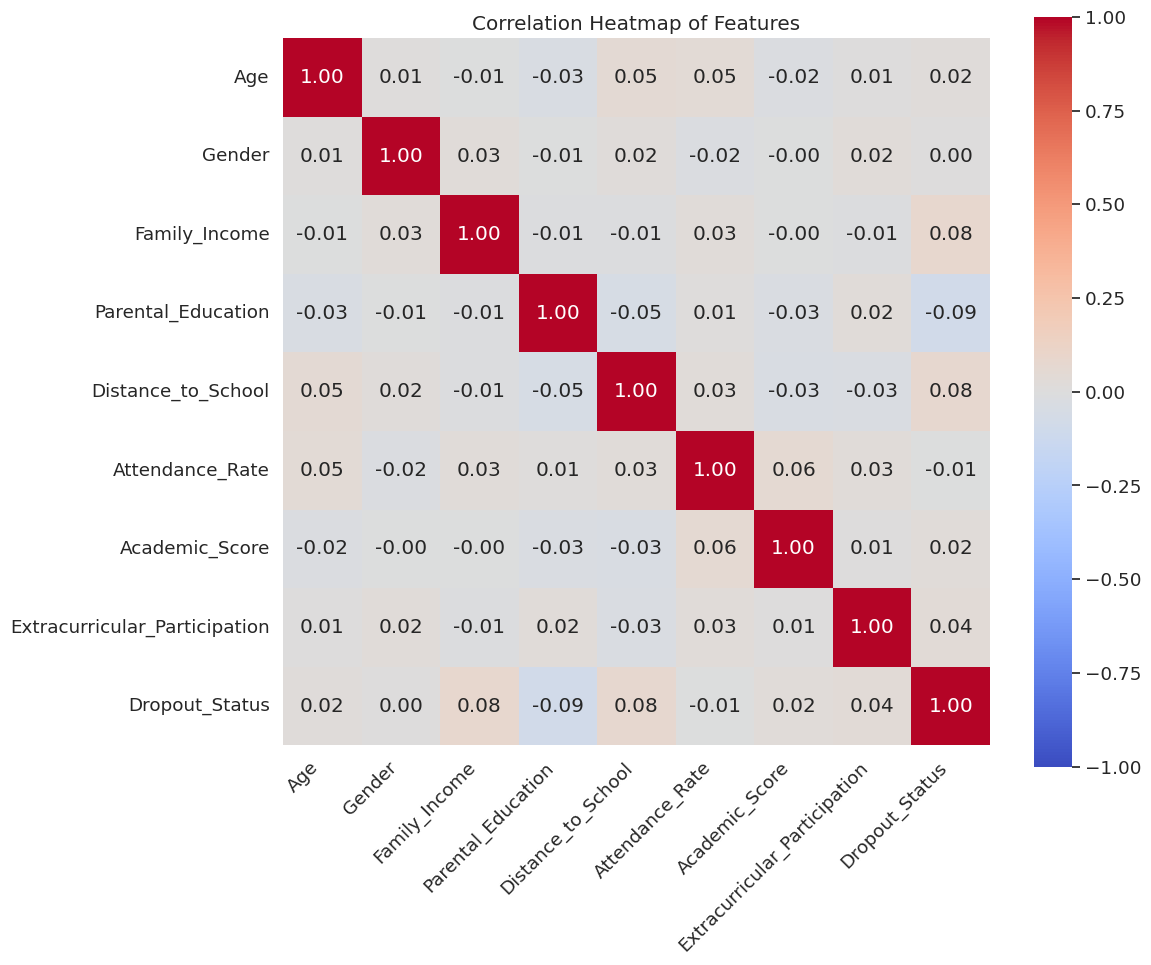

In [ ]:
# Figure 3: Correlation Heatmap
plt.figure(figsize=(12, 10))  # Increased figure size to accommodate labels
# Exclude non-numeric column 'School_ID'
numeric_df = df.drop(columns=['School_ID'])
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f',
            xticklabels=corr.columns, yticklabels=corr.columns,
            square=True)
plt.title('Correlation Heatmap of Features')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.yticks(rotation=0)  # Ensure y-axis labels are horizontal
plt.tight_layout()
plt.savefig('correlation_heatmap.png')
plt.show()

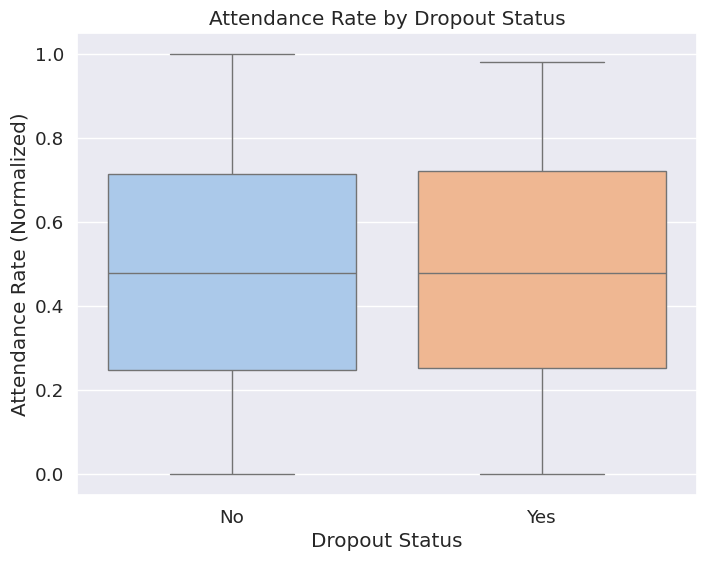

In [ ]:

# Figure 4: Box Plot of Attendance Rate by Dropout Status
plt.figure(figsize=(8, 6))
sns.boxplot(x='Dropout_Status', y='Attendance_Rate', hue='Dropout_Status', data=df, palette='pastel', legend=False)
plt.title('Attendance Rate by Dropout Status')
plt.xticks([0, 1], ['No', 'Yes'])
plt.xlabel('Dropout Status')
plt.ylabel('Attendance Rate (Normalized)')
plt.savefig('boxplot_attendance_dropout.png')
plt.show()

<Figure size 1000x1000 with 0 Axes>

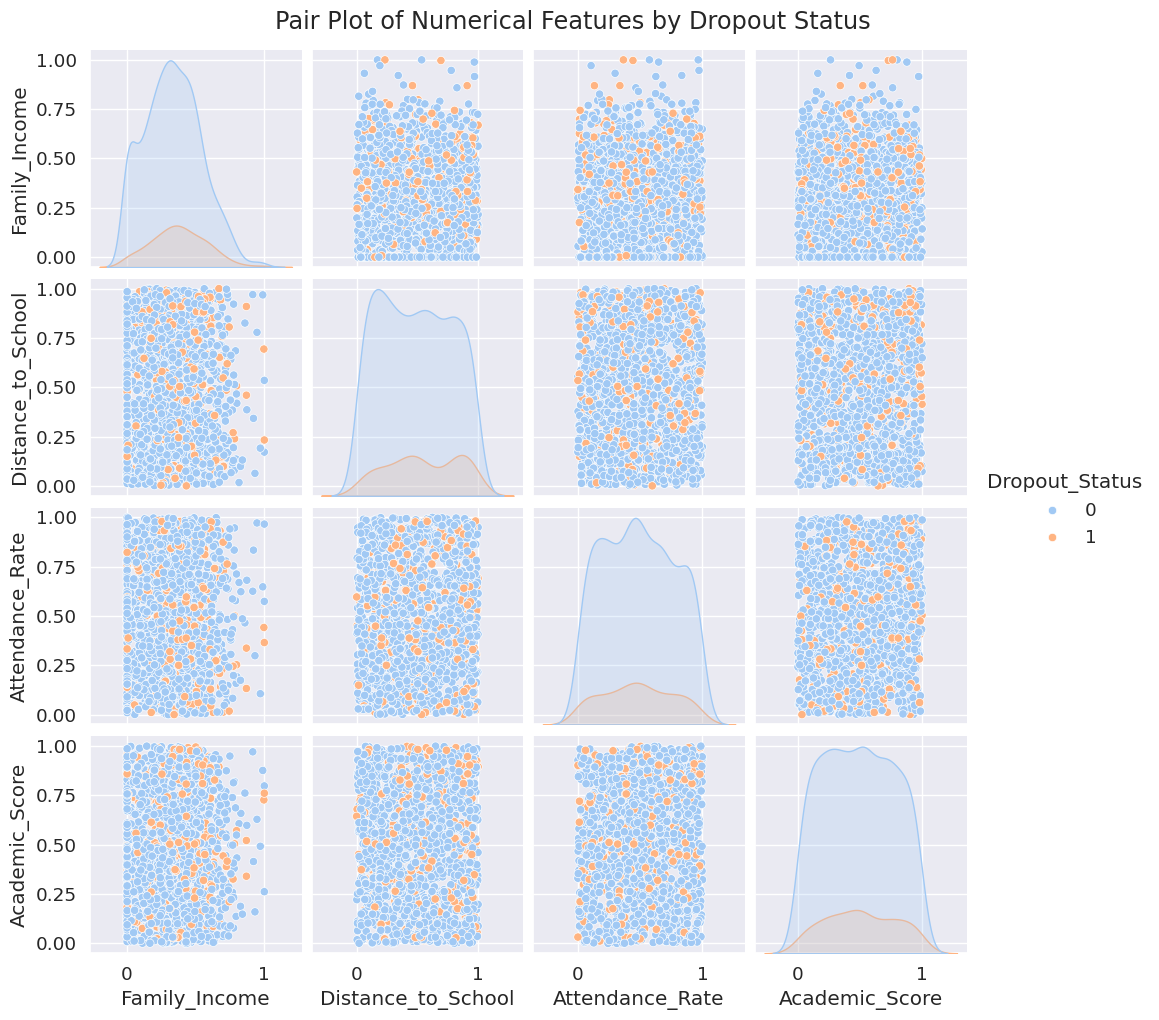

Pair plot saved as 'pairplot_numerical_features.png'


In [ ]:
# Figure 5: Pair Plot of Numerical Features
plt.figure(figsize=(10, 10))
numerical_cols = ['Family_Income', 'Distance_to_School', 'Attendance_Rate', 'Academic_Score']
sns.pairplot(df[numerical_cols + ['Dropout_Status']], hue='Dropout_Status', palette='pastel', diag_kind='kde')
plt.suptitle('Pair Plot of Numerical Features by Dropout Status', y=1.02)
plt.savefig('pairplot_numerical_features.png')
plt.show()

print("Pair plot saved as 'pairplot_numerical_features.png'")

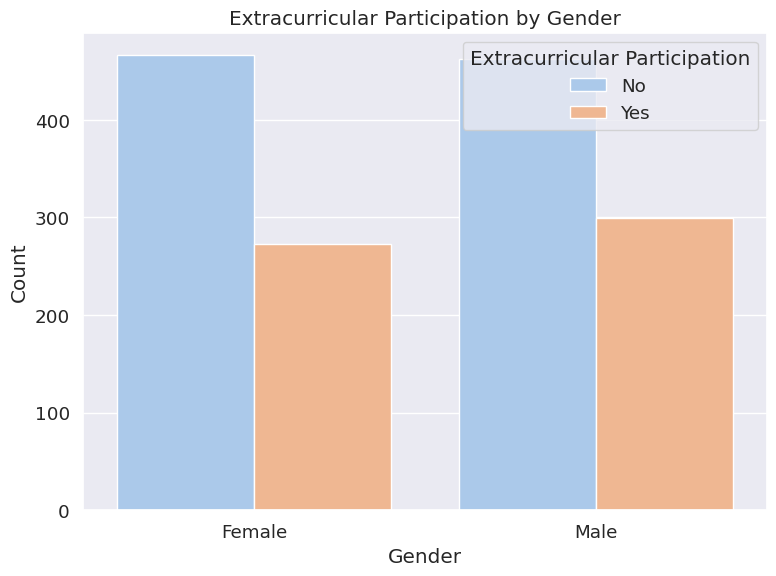

Count plot saved as 'countplot_extracurricular_gender.png'


In [ ]:
# Figure 6: Count Plot of Extracurricular Participation by Gender
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', hue='Extracurricular_Participation', data=df, palette='pastel')
plt.title('Extracurricular Participation by Gender')
plt.xticks([0, 1], ['Female', 'Male'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Extracurricular Participation', labels=['No', 'Yes'])
plt.tight_layout()
plt.savefig('countplot_extracurricular_gender.png')
plt.show()

print("Count plot saved as 'countplot_extracurricular_gender.png'")

/tmp/ipython-input-43-3860601318.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='School_ID_Group', y='Academic_Score', hue='Dropout_Status', data=df, palette='Set2', ci=None, estimator='mean')


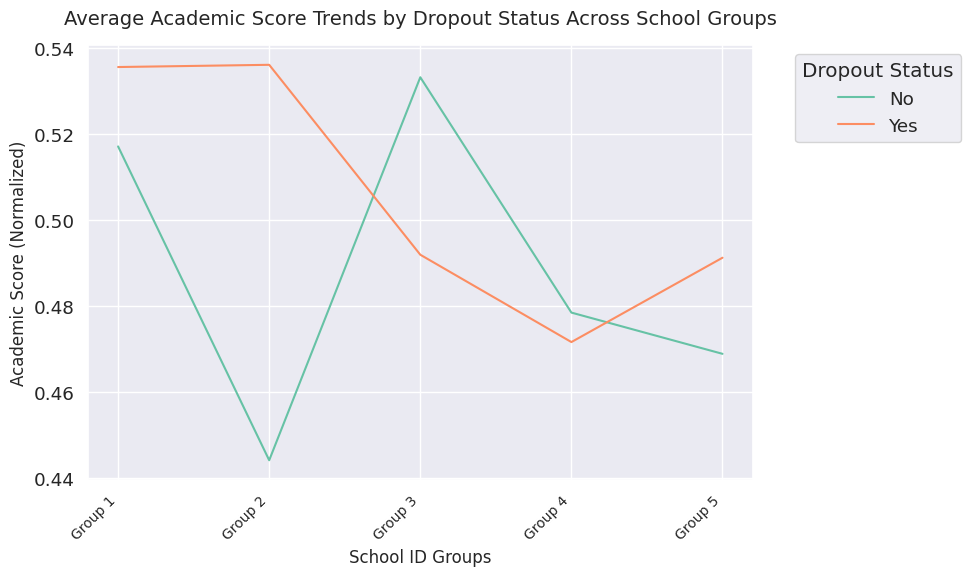

Improved time series plot saved as 'time_series_academic_score_grouped.png'


In [ ]:
# Converting School_ID to numeric for binning and group into ranges
df['School_ID_Num'] = df['School_ID'].str.replace('SCH', '').astype(int)
df['School_ID_Group'] = pd.cut(df['School_ID_Num'], bins=5, labels=['Group 1', 'Group 2', 'Group 3', 'Group 4', 'Group 5'])

# Figure 7:Time Series Plot of Academic Score Trends by Dropout Status
plt.figure(figsize=(10, 6))
sns.lineplot(x='School_ID_Group', y='Academic_Score', hue='Dropout_Status', data=df, palette='Set2', ci=None, estimator='mean')
plt.title('Average Academic Score Trends by Dropout Status Across School Groups', fontsize=14, pad=15)
plt.xlabel('School ID Groups', fontsize=12)
plt.ylabel('Academic Score (Normalized)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend(title='Dropout Status', labels=['No', 'Yes'], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('time_series_academic_score_grouped.png', dpi=300, bbox_inches='tight')
plt.show()

print("Improved time series plot saved as 'time_series_academic_score_grouped.png'")

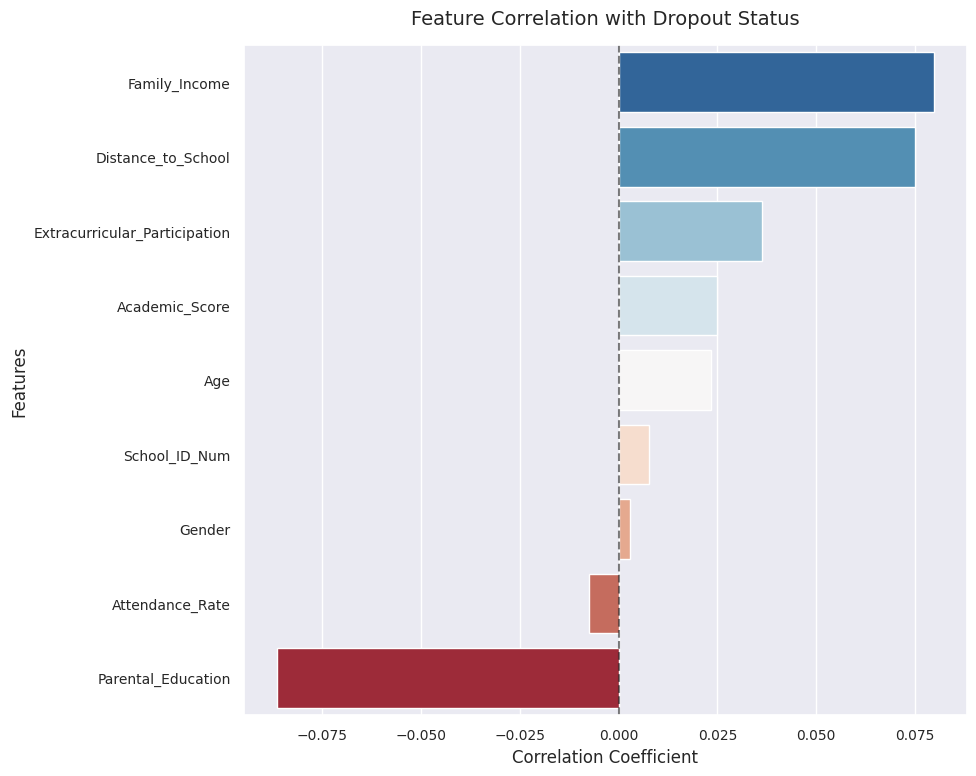

Improved feature correlation plot saved as 'feature_correlation_dropout.png'


In [ ]:
# Select only numeric columns for correlation
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
numeric_df = df[numeric_cols]

# Figure 8: Improved Feature Correlation with Dropout Status
plt.figure(figsize=(10, 8))
correlations = numeric_df.corr()['Dropout_Status'].drop('Dropout_Status').sort_values(ascending=False)
sns.barplot(x=correlations.values, y=correlations.index, hue=correlations.index, palette='RdBu_r', legend=False)
plt.axvline(x=0, color='black', linestyle='--', alpha=0.5)  # Add zero line for reference
plt.title('Feature Correlation with Dropout Status', fontsize=14, pad=15)
plt.xlabel('Correlation Coefficient', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.savefig('feature_correlation_dropout.png', dpi=300)
plt.show()

print("Improved feature correlation plot saved as 'feature_correlation_dropout.png'")

Developing Model

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE
import numpy as np

In [42]:
# Setting plot style
sns.set_style('whitegrid')
sns.set(font_scale=1.2)

In [43]:
# Loading preprocessed dataset
df = pd.read_csv('preprocessed_bagmati_education.csv')

In [44]:
# Features and target
X = df.drop(columns=['Dropout_Status', 'School_ID'])
y = df['Dropout_Status']


In [45]:
# Handling class imbalance with adjusted SMOTE
smote = SMOTE(sampling_strategy=0.8, random_state=42)
X_res, y_res = smote.fit_resample(X, y)

In [46]:
# Computing class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y), y=y)
class_weight_dict = {0: class_weights[0], 1: class_weights[1]}

In [47]:
# Splitting the resampled data
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42, stratify=y_res)

In [48]:
# Hyperparameter tuning for Random Forest
rf_param_grid = {'n_estimators': [200, 300], 'max_depth': [20, 30], 'min_samples_split': [5, 10]}
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42, class_weight=class_weight_dict), rf_param_grid, cv=5, scoring='f1_weighted')
rf_grid.fit(X_train, y_train)
rf_model = rf_grid.best_estimator_
rf_pred = rf_model.predict(X_test)

In [49]:
# Evaluating model
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred, average='weighted')
rf_cm = confusion_matrix(y_test, rf_pred)
rf_roc_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])

In [50]:
# we are Cross-validating to check the model's accuracy
rf_cv_scores = cross_val_score(rf_model, X_res, y_res, cv=5, scoring='accuracy')


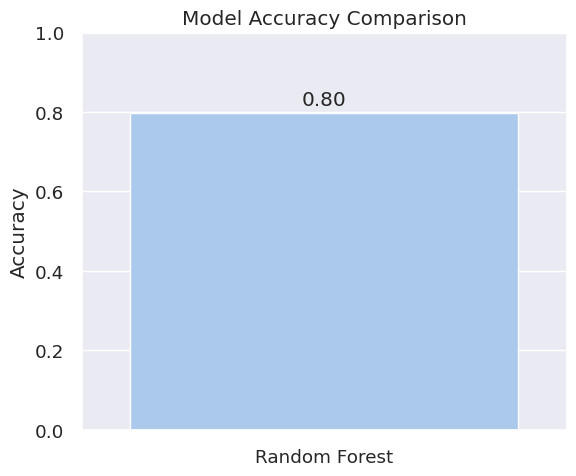

In [51]:
# Visualizing Accuracy Graph
models = ['Random Forest']
accuracies = [rf_accuracy]
plt.figure(figsize=(6, 5))
sns.barplot(x=models, y=accuracies, hue=models, palette='pastel', legend=False)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.02, f'{v:.2f}', ha='center')
plt.savefig('accuracy_comparison.png')
plt.show()

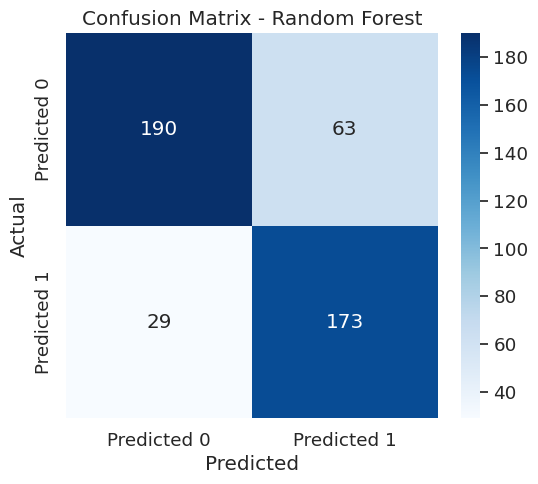

In [ ]:
# Visualizing Confusion Matrix
plt.figure(figsize=(6, 5))
cm_labels = ['Predicted 0', 'Predicted 1']
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues', xticklabels=cm_labels, yticklabels=cm_labels)
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('confusion_matrix.png')
plt.show()

In [ ]:
# Printing results
print("Random Forest Metrics:")
print(f"Accuracy: {rf_accuracy:.2f}")
print(f"F1-Score: {rf_f1:.2f}")
print(f"ROC-AUC: {rf_roc_auc:.2f}")
print(f"Confusion Matrix:\n{rf_cm}")
print(f"Cross-Validation Accuracy (mean ± std): {rf_cv_scores.mean():.2f} ± {rf_cv_scores.std():.2f}")


Random Forest Metrics:
Accuracy: 0.80
F1-Score: 0.80
ROC-AUC: 0.89
Confusion Matrix:
[[190  63]
 [ 29 173]]
Cross-Validation Accuracy (mean ± std): 0.80 ± 0.06


In [ ]:
# Save predictions for verification
np.savetxt('rf_predictions_new.csv', rf_pred, delimiter=',')